# Binomial Example
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/binomial_examples.ipynb)

Example 20 from the notes

48 CMIP5 models are discussed in the IPCC 5th Assessment Report. How many models must agree that global temperatures will increase by 2100 so that we can say with 95% certainty that the models do not agree purely by chance? What is the 95% confidence interval on the number of models with increasing temperatures under the null hypothesis?

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

First, let's do this the old fashioned way. That is, we are going to actually write a loop to determine the number of models $k$ that must agree to achieve our desired probability of 95%. That is, we will write a loop to compute the probability of 1 model agreeing on an increease, then 2 models agreeing, then 3 models agreeing...You will see that loop below. We can then figure out at what value of $k$ does the model pass the 0.95 probability line.

k = 0, sum = 3.552713678800511e-15
k = 1, sum = 1.7408297026121985e-13
k = 2, sum = 4.181543999948212e-12
k = 3, sum = 6.562927978847952e-11
k = 4, sum = 7.569163074094798e-10
k = 5, sum = 6.840242150474192e-09
k = 6, sum = 5.0437410692438736e-08
k = 7, sum = 3.120204219442268e-07
k = 8, sum = 1.6526333546096201e-06
k = 9, sum = 7.6109130553448016e-06
k = 10, sum = 3.0848203888211585e-05
k = 11, sum = 0.00011112248131084499
k = 12, sum = 0.00035863483669729005
k = 13, sum = 0.0010440536669982315
k = 14, sum = 0.0027576007427505623
k = 15, sum = 0.0066416407811224175
k = 16, sum = 0.014652473360264562
k = 17, sum = 0.029731687626884953
k = 18, sum = 0.055701445530509194
k = 19, sum = 0.09670632643096871
k = 20, sum = 0.15616340373663382
k = 21, sum = 0.23543950681085554
k = 22, sum = 0.3327329060383079
k = 23, sum = 0.44271674864325405
k = 24, sum = 0.5572832513567403
k = 25, sum = 0.6672670939616864
k = 26, sum = 0.7645604931891388
k = 27, sum = 0.8438365962633605
k = 28, sum = 0.90329

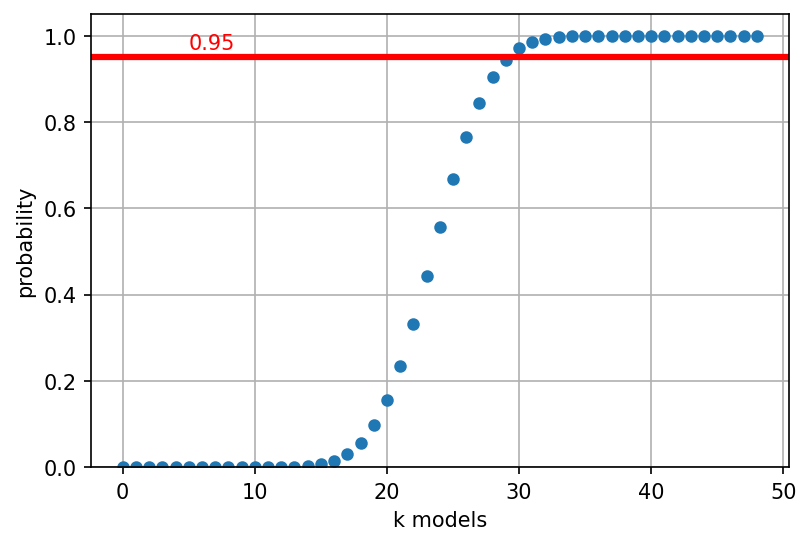

In [2]:
N = 48
probCorr = 0.5
alpha = 0.05

#---------------------

run_sum_vec = []
r_sum = 0
for k in np.arange(0,N+1):
    prob = stats.binom.pmf(k,N,probCorr)
    r_sum = r_sum + prob
    run_sum_vec.append(r_sum)
    print('k = ' + str(k) + ', sum = ' + str(r_sum))
    
plt.figure(figsize=(6,4))    
plt.plot(run_sum_vec,'.',markersize=10)
plt.axhline(y=1-alpha,color='red',linewidth=3)    
plt.text(5,1-alpha+.02,str(1-alpha),color='red')
plt.grid('on')
plt.xlabel('k models')
plt.ylabel('probability')
plt.ylim(0,1.05)
plt.show()

Looks like 30 models! Cool. But there has to be another way to do this right? Imagine you had 1000 models...that loop would be slow. 

Indeed, there is another way. Specifically, we can use the stats package to do this.

In [3]:
stats.binom.ppf(1-alpha,N,probCorr)

30.0

And surprising noone, we get the same answer! Great.

Now for the second part of the problem. What are the 95% confidence bounds on the number of models that will agree by chance alone (for alpha=0.05)? That is, now I want 2.5% on either side of distribution. This can be done with the same stats package, now using the method ```interval```.

In [4]:
bin_int = stats.binom.interval(1-alpha, N, probCorr)
bin_int

(17.0, 31.0)

We can visualize this too to make sure it makes sense to our brain.

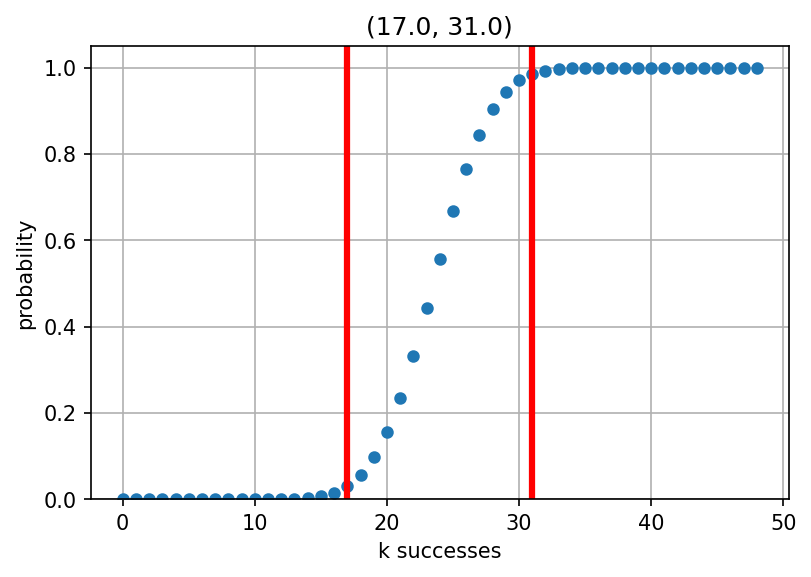

In [5]:
plt.figure(figsize=(6,4))    
plt.plot(run_sum_vec,'.',markersize=10)
plt.axvline(x=bin_int[0],color='red',linewidth=3)    
plt.axvline(x=bin_int[1],color='red',linewidth=3)    
plt.grid('on')
plt.xlabel('k successes')
plt.ylabel('probability')
plt.title(bin_int)
plt.ylim(0,1.05)
plt.show()

Looking at my plot, these values make sense. So I am happy.

## Normal approximation to the binomial

Our notes discuss that the binomial can be approximated by the normal distribution under certain conditions based on $N$ and $probCorr$. Checking that these assumptions are met, let's compute the 95% confidence interval using this normal approximation and see if it agrees with the one we computed above.

In [6]:
#theoretical mu and sigma for large enough N
mu = N*probCorr
sigma = np.sqrt(N*probCorr*(1-probCorr))

norm_int = stats.norm.interval(1-alpha,loc=mu,scale=sigma)
norm_int

(17.21048559554297, 30.78951440445703)

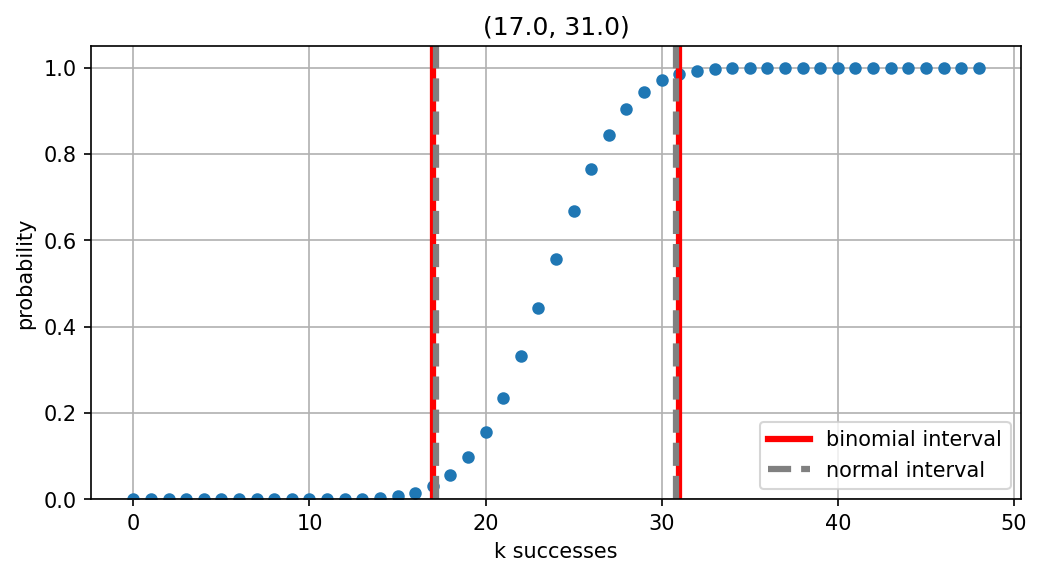

In [7]:
plt.figure(figsize=(8,4))    
plt.plot(run_sum_vec,'.',markersize=10)

plt.axvline(x=bin_int[0],color='red',linewidth=3,label='binomial interval')    
plt.axvline(x=bin_int[1],color='red',linewidth=3)    

plt.axvline(x=norm_int[0],color='gray',linewidth=3,linestyle='--',label='normal interval')    
plt.axvline(x=norm_int[1],color='gray',linewidth=3,linestyle='--')    

plt.legend(loc=4)
plt.grid('on')
plt.xlabel('k successes')
plt.ylabel('probability')
plt.title(bin_int)
plt.ylim(0,1.05)
plt.show()

Wow! Pretty darn close. 